In [22]:
import pandas as pd
from os import listdir
from os.path import isfile, join

# Read all results from txt files


aco_path = "./raw_files/ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./raw_files/GA/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./raw_files/PSO/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]


# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)


    
    
# -------------------------------------------------------------------------------------
# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-pop"]
df_ga = pd.DataFrame(columns = column_names)

for file in ga_files:
    f_path = join(ga_path,file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    pop = float(res['B'][5]) # population size

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Cost']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
        
    df_ga = df_ga.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "N-pop": pop}, ignore_index=True)



# -------------------------------------------------------------------------------------
# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)

for file in pso_files:
    f_path = join(pso_path,file)
    res = pd.read_csv(f_path, names=["A","B","C"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    vel = float(res['B'][5]) # velocity
    c1 = float(res['B'][6]) # personal coefficient
    c2 = float(res['B'][7]) # global coefficient
    npat = float(res['B'][8]) # particle count

    sup = float(res['B'][9]) # minimum support
    pat = float(res['B'][11]) # patterns
    mit = int(res['B'][12]) # maximum iteraction count
    its = res.loc[res['B'] == ' Best Position']['C'].values # iterations
    
    if att == 98:
        col = "C2K"
    elif att == 10:
        col = "B & C"
    elif att == 9:
        col = "UCI"
    elif att == 21:
        col = "Buoys"
    else:
        col = ""
        
    df_pso = df_pso.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)



In [10]:
df_pso

,Data-set,Size,Algorithm,Support,Run-time,Memory,Pattern-count,Max-iteration,Iterations,N-particle,Velocity,C1,C2
0,Buoys,6120,PSO-GRAANK (v1.0),0.5,567.600,105.0,2.0,100,"[1.66, 1.38, 1.25, 1.25, 1.25, 1.25, 1.25, 1.2...",10.0,0.5,0.1,0.5
1,Buoys,6120,PSO-GRAANK (v1.0),0.5,1371.000,105.0,1.0,100,"[1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.4...",10.0,0.5,0.1,0.5
2,B & C,116,PSO-GRAANK (v1.0),0.5,0.893,85.2,1.0,100,"[1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.6...",10.0,0.5,0.1,0.5
3,B & C,116,PSO-GRAANK (v1.0),0.5,0.615,86.0,3.0,100,"[1.84, 1.82, 1.49, 1.49, 1.49, 1.49, 1.49, 1.4...",10.0,0.5,0.1,0.5
4,C2K,3943,PSO-GRAANK (v1.0),0.5,1112.000,115.0,2.0,100,"[1.89, 1.42, 1.21, 1.21, 1.21, 1.21, 1.21, 1.2...",10.0,0.5,0.1,0.5
5,UCI,19443,PSO-GRAANK (v1.0),0.5,3271.000,98.3,1.0,100,"[1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.0...",10.0,0.5,0.1,0.5
6,C2K,3943,PSO-GRAANK (v1.0),0.5,1820.000,117.0,1.0,100,"[1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.9...",10.0,0.5,0.1,0.5
7,Buoys,6120,PSO-GRAANK (v1.0),0.5,385.800,105.0,3.0,100,"[1.72, 1.5, 1.43, 1.37, 1.37, 1.37, 1.37, 1.37...",10.0,0.5,0.1,0.5
8,UCI,19443,PSO-GRAANK (v1.0),0.5,2901.000,98.7,1.0,100,"[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, ...",10.0,0.5,0.1,0.5
9,UCI,19443,PSO-GRAANK (v1.0),0.5,2558.000,98.9,1.0,100,"[1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.0...",10.0,0.5,0.1,0.5


In [11]:
#df_aco1 = df_aco[['Data-set', 'Algorithm', 'Pattern-count', 'Max-iteration', 'Iterations', 'E-factor']]

#df = df_aco1.groupby(["Algorithm", "E-factor", "Data-set"]).describe()
#df2 = pd.concat([df.min(), df.mean(), df.max(), df.std()], keys=['min', 'mean', 'max', 'std'], axis=1)
#df2.filter(like="Run-time")
#df2.columns = df2.columns.swaplevel(0, 1)
#df2.sort_index(axis=1, level=0, inplace=True, ascending=False)
#df.round(3)

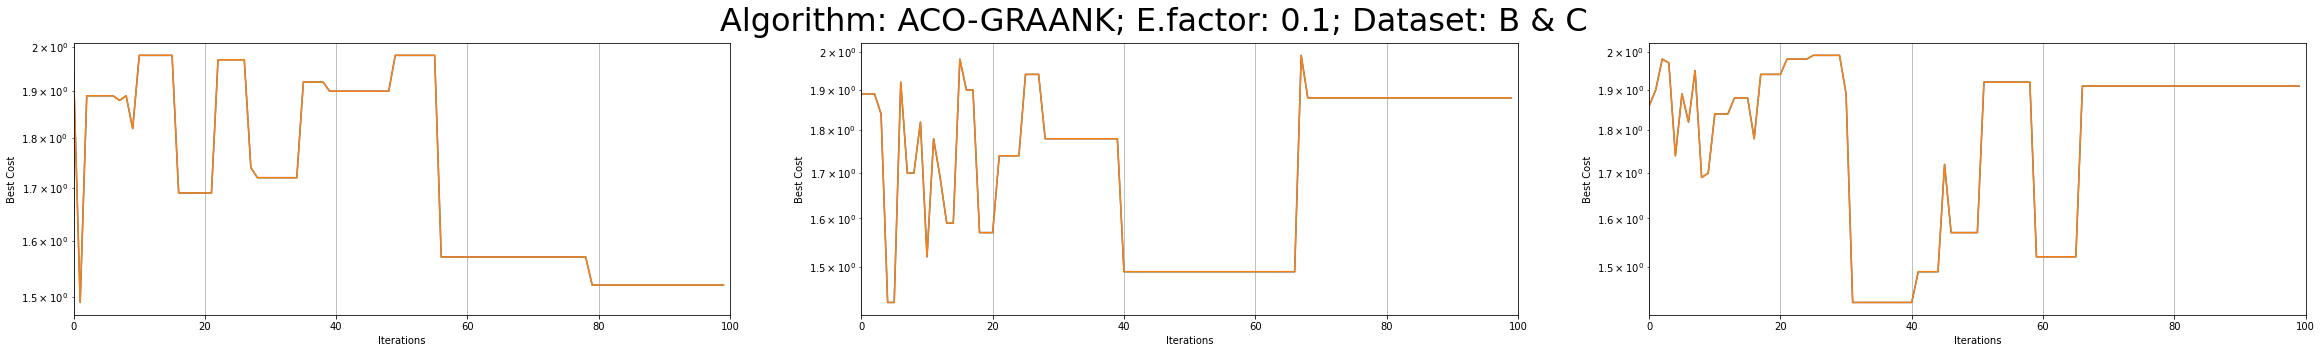

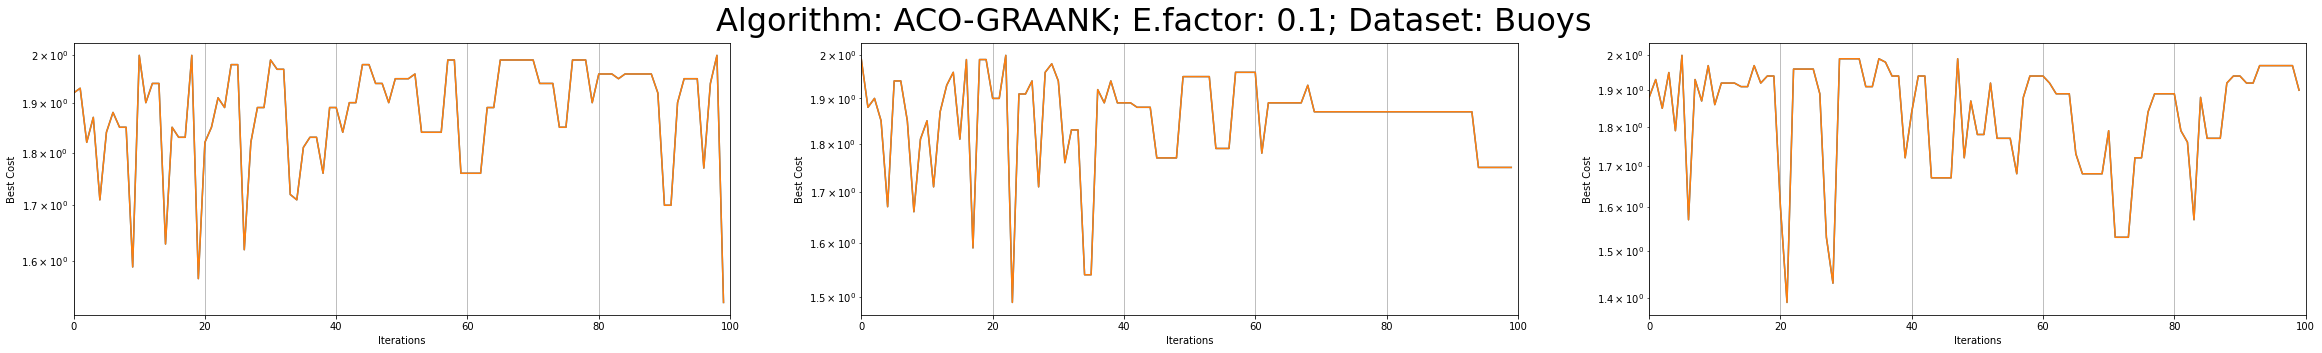

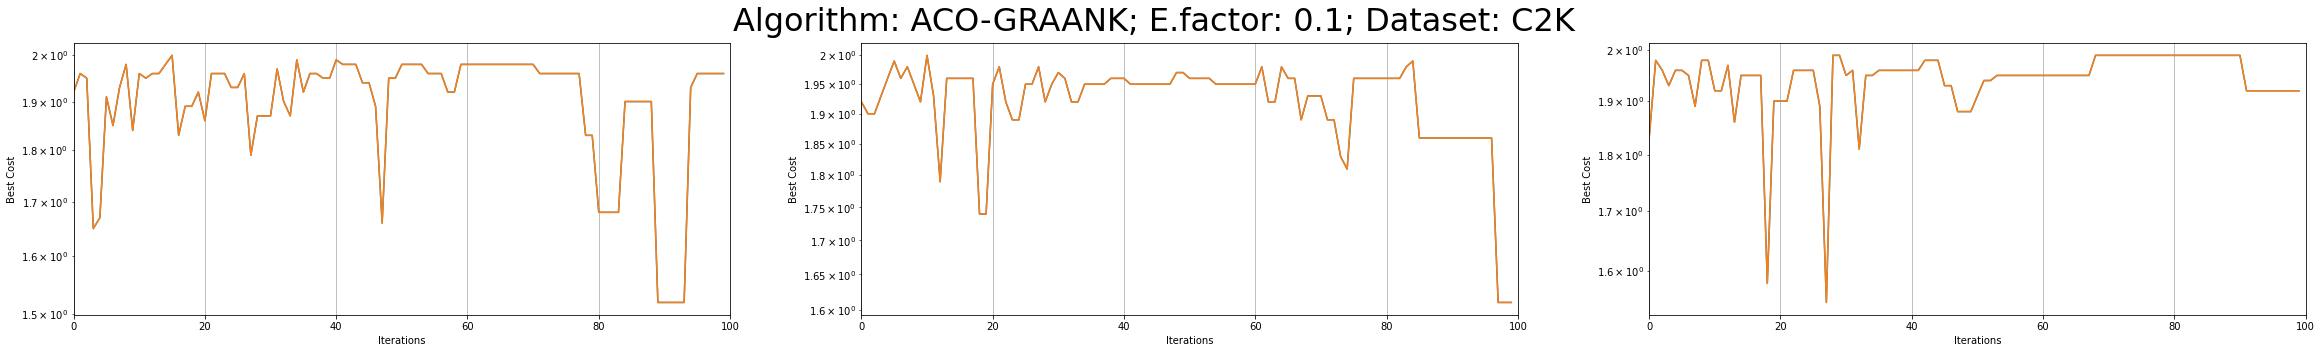

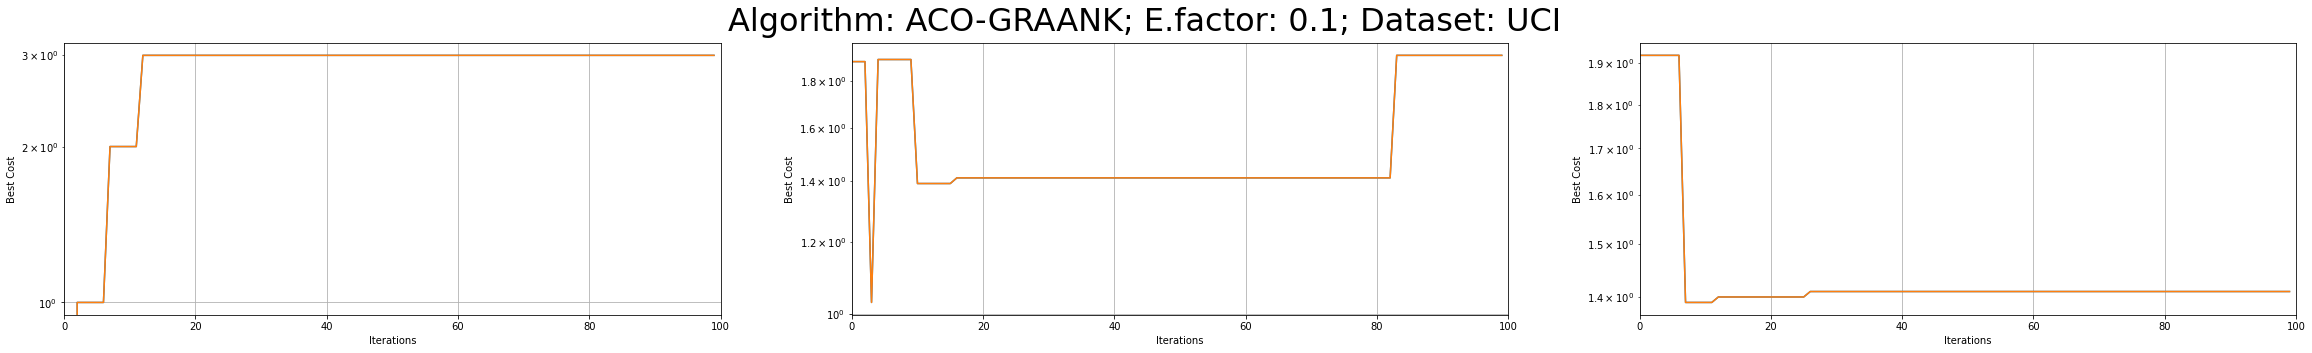

In [12]:
import matplotlib.pyplot as plt

data_sets = ['B & C', 'Buoys', 'C2K', 'UCI']
for ds in data_sets:
    df = df_aco.loc[df_aco['Data-set'] == ds]
    
    fig = plt.figure(figsize=(40,5))
    
    #fig = plt.figure()
    #axes = fig.subplots(nrows=1, ncols=4)
    i = 1

    for index,row in df.iterrows():
        # Results
        plt.subplot(1, 3, i)
        plt.plot(row['Iterations'])
        plt.semilogy(row['Iterations'])
        plt.xlim(0, row['Max-iteration'])
        plt.xlabel('Iterations')
        plt.ylabel('Best Cost')
        #plt.title('ACO, Dataset: ' + ds)
        plt.grid(True)
        i += 1
    
    fig.suptitle('Algorithm: ACO-GRAANK; E.factor: ' + str(row['E-factor']) + '; Dataset: ' + ds, fontsize=32)
    plt.show()

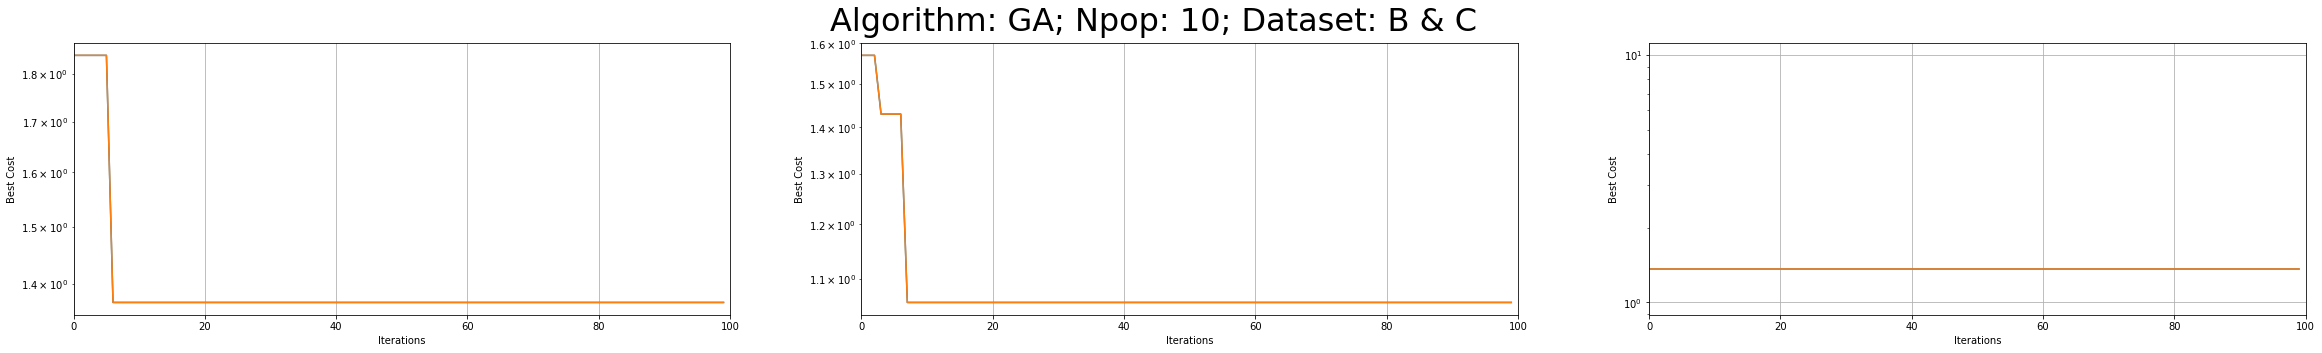

<Figure size 2880x360 with 0 Axes>

<Figure size 2880x360 with 0 Axes>

<Figure size 2880x360 with 0 Axes>

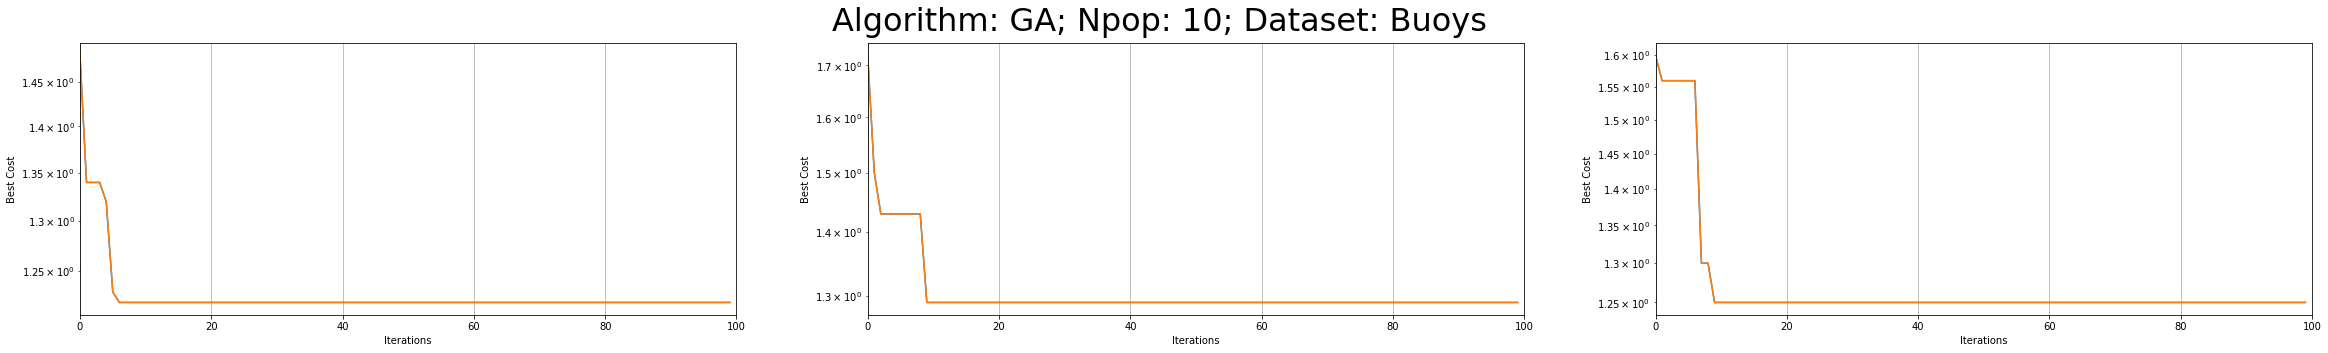

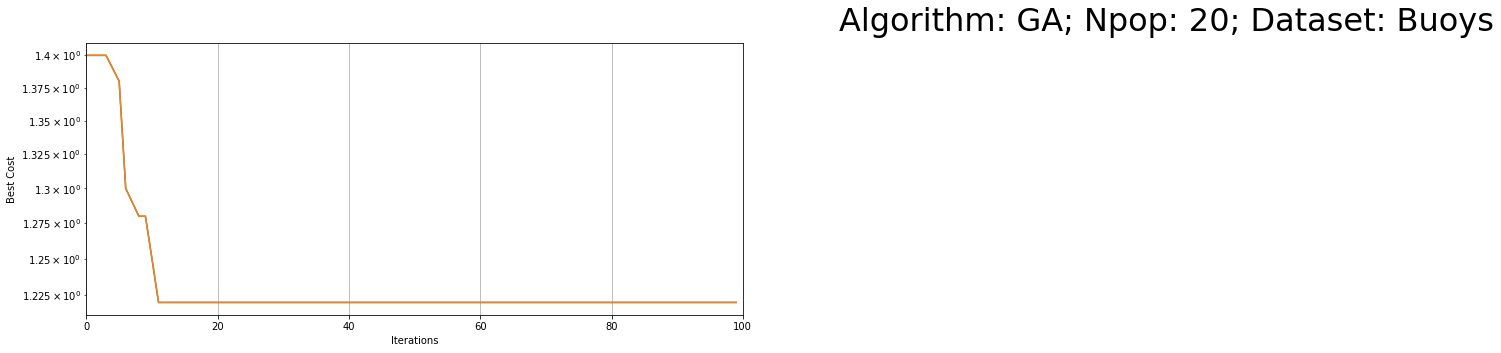

<Figure size 2880x360 with 0 Axes>

<Figure size 2880x360 with 0 Axes>

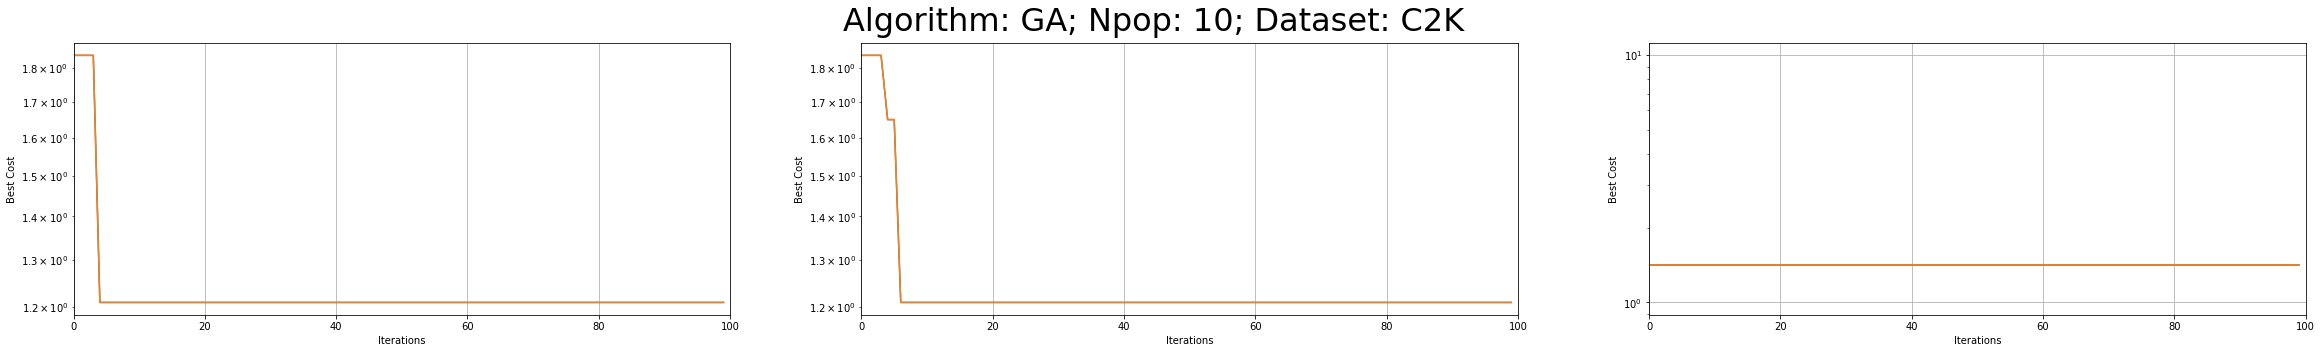

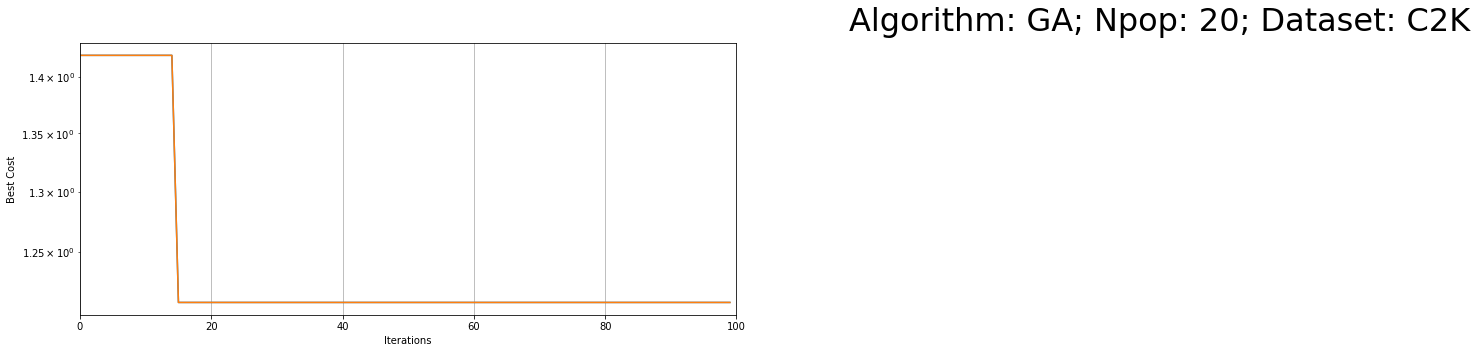

<Figure size 2880x360 with 0 Axes>

<Figure size 2880x360 with 0 Axes>

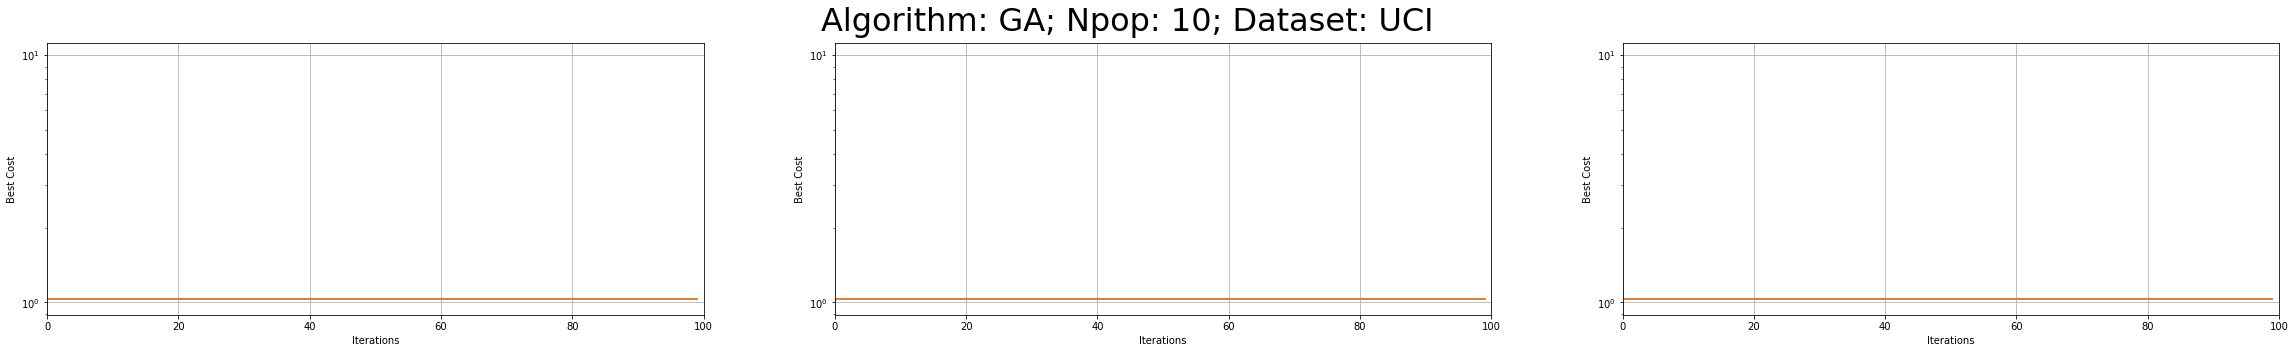

<Figure size 2880x360 with 0 Axes>

<Figure size 2880x360 with 0 Axes>

<Figure size 2880x360 with 0 Axes>

In [23]:
for ds in data_sets:
    df1 = df_ga.loc[df_ga['Data-set'] == ds]
    npop = [10, 20, 40, 60]
    
    for n in npop:
        df2 = df1.loc[df_ga['N-pop'] == n]
    
        fig = plt.figure(figsize=(40,5))
        #fig = plt.figure()
        #axes = fig.subplots(nrows=1, ncols=4)
        i = 1
        for index,row in df2.iterrows():
            # Results
            plt.subplot(1, 3, i)
            plt.plot(row['Iterations'])
            plt.semilogy(row['Iterations'])
            plt.xlim(0, row['Max-iteration'])
            plt.xlabel('Iterations')
            plt.ylabel('Best Cost')
            #plt.title('ACO, Dataset: ' + ds)
            plt.grid(True)
            i += 1

        fig.suptitle('Algorithm: GA; Npop: ' + str(n) + '; Dataset: ' + ds, fontsize=32)
        plt.show()

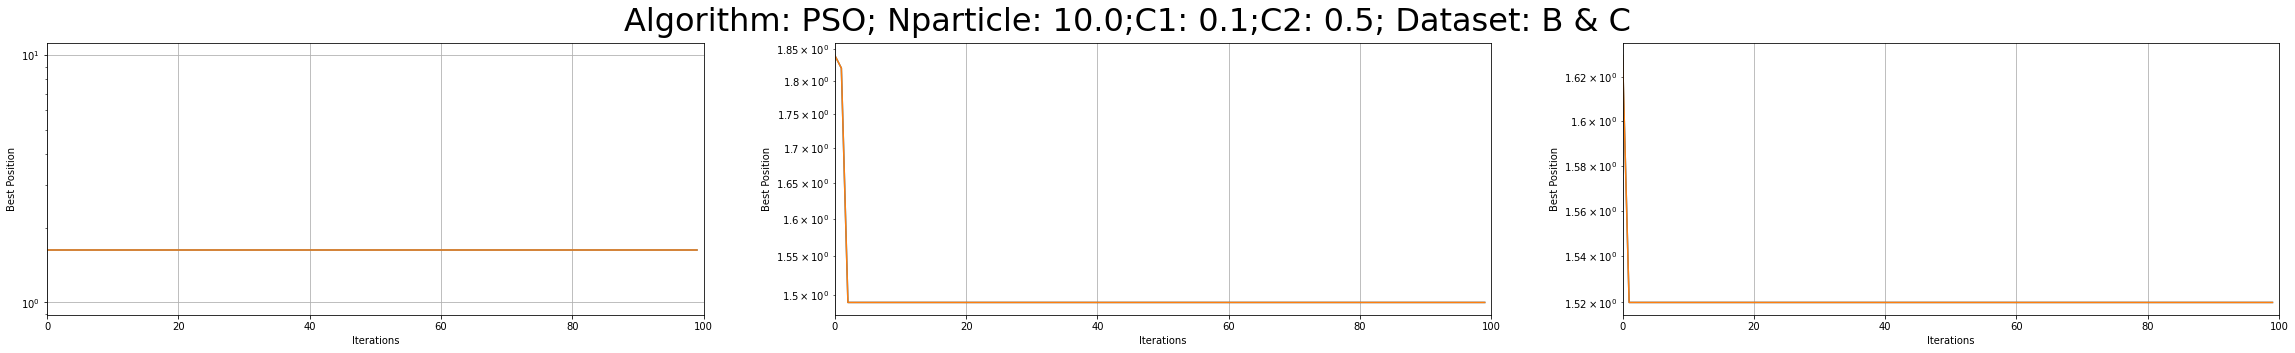

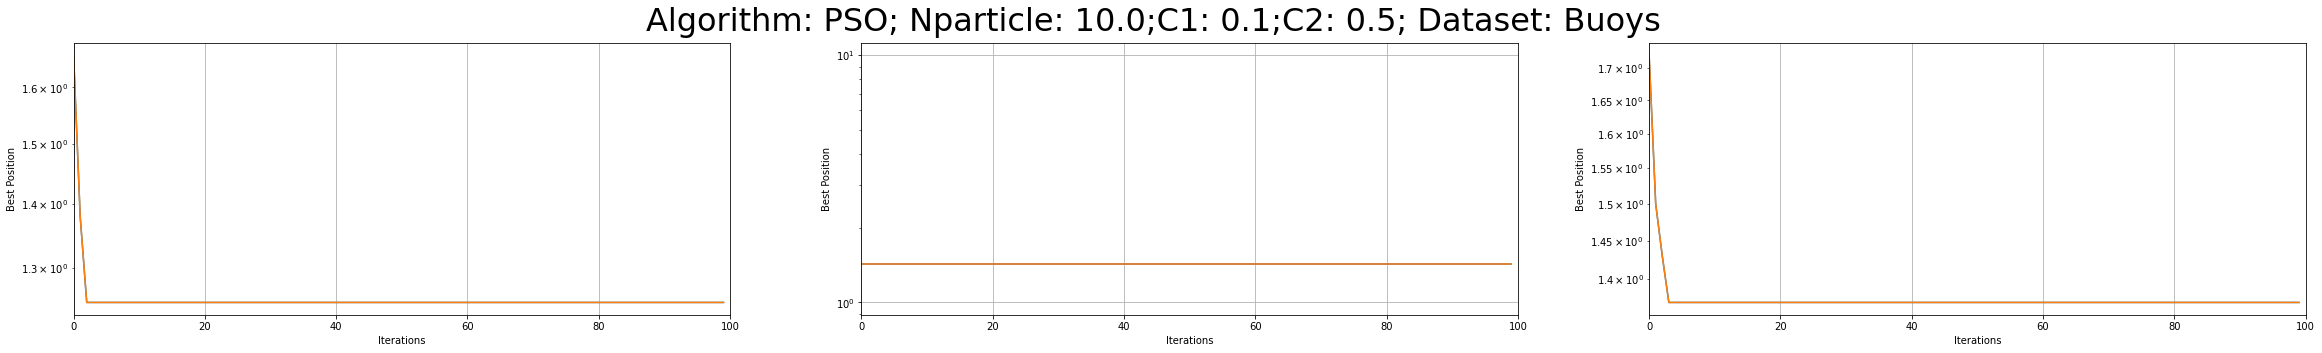

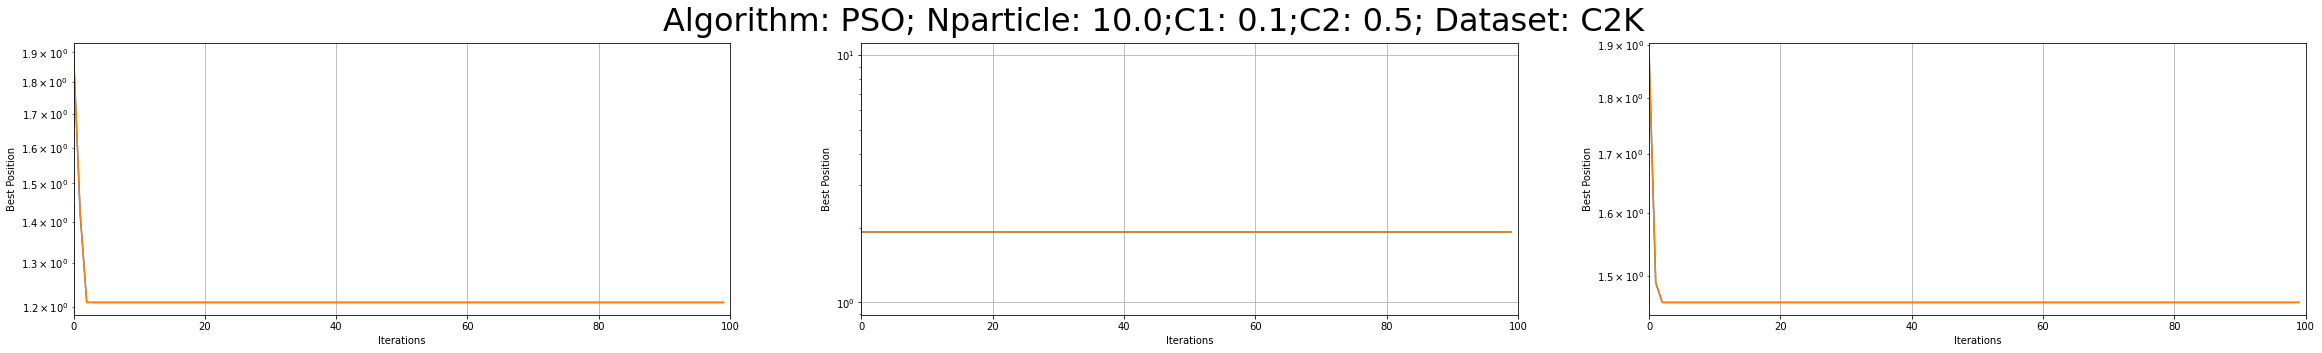

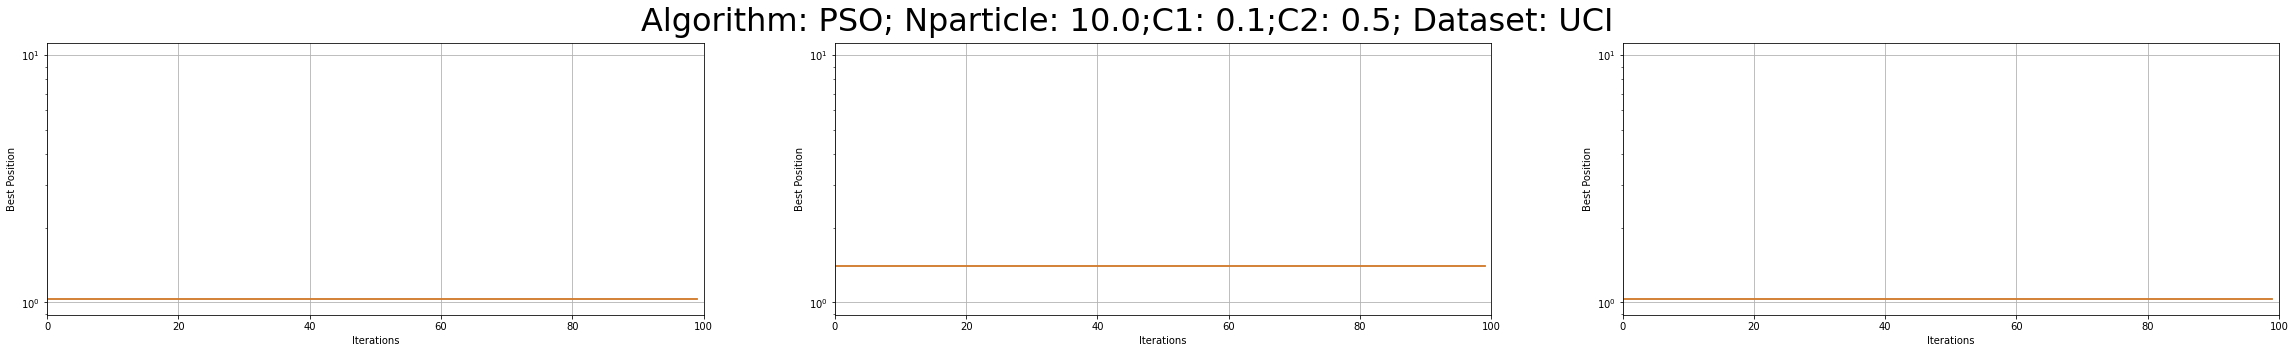

In [15]:
for ds in data_sets:
    df = df_pso.loc[df_pso['Data-set'] == ds]
    
    fig = plt.figure(figsize=(40,5))
    
    #fig = plt.figure()
    #axes = fig.subplots(nrows=1, ncols=4)
    i = 1

    for index,row in df.iterrows():
        # Results
        plt.subplot(1, 3, i)
        plt.plot(row['Iterations'])
        plt.semilogy(row['Iterations'])
        plt.xlim(0, row['Max-iteration'])
        plt.xlabel('Iterations')
        plt.ylabel('Best Position')
        #plt.title('ACO, Dataset: ' + ds)
        plt.grid(True)
        i += 1
    
    fig.suptitle('Algorithm: PSO; Nparticle: ' + str(row['N-particle']) + ';C1: ' + str(row['C1']) + ';C2: ' + str(row['C2']) + '; Dataset: ' + ds, fontsize=32)
    plt.show()